### point processing
This topic talks about the point processing, which means we only process the pixel itself without knowing its neighborhood information. The transformation can be defined as  
$g(x,y)=\textbf{T}[f(x,y)]$  
where $f$ is the input image, $g$ is the output image, $(x,y)$ is the position of pixels and $\textbf{T}$ is the operator.

Firstly, we import some required modules.

In [2]:
import skimage
import numpy
import matplotlib.pyplot as plt

**Linear operation**  

$g(x,y)=c*f(x,y)\pm b$  

where $c$ and $b$ are parameters. Remember to **clip** the output values.

$g(x,y)=\begin{cases}
255&if\;s>255\\0&if\;s<0\\g(x,y)&otherwise
\end{cases}$


In [3]:
def linear_operation(img, c=1.0, b=0):
  img_float = c*img.astype(numpy.float) + b
  img_float[img_float>255] = 255
  img_float[img_float<0] = 0
  return img_float.astype(numpy.uint8)

Now we load the example image.

In [4]:
img = skimage.data.camera()

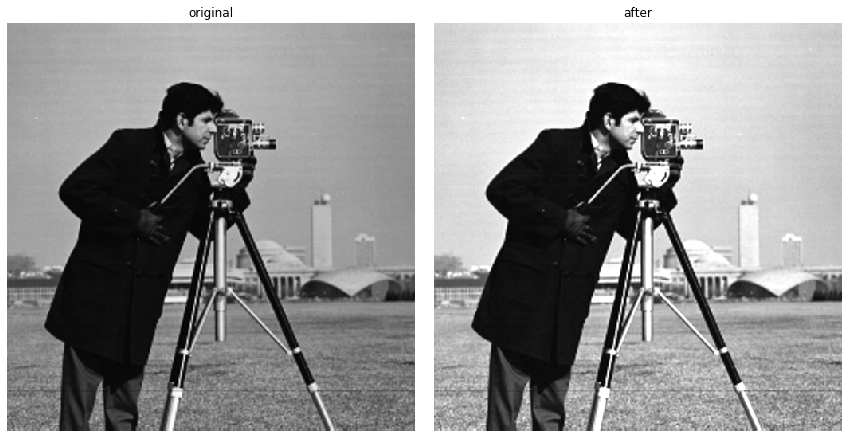

In [5]:
img_new = linear_operation(img, b=64)
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.axis('off')
plt.title('after')
plt.imshow(img_new, cmap='gray')
plt.tight_layout()
plt.show()

**negative transform**  
The negative transform is very simple.  

$g(x,y)=255-f(x,y)$


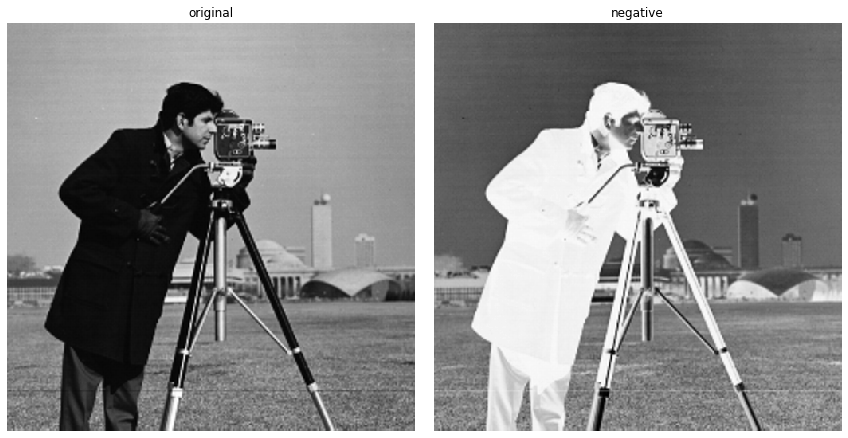

In [6]:
img = skimage.data.camera()
img_neg = 255 - img  #create negative image
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(2,2,2)
plt.axis('off')
plt.title('negative')
plt.imshow(img_neg, cmap='gray')
plt.tight_layout()
plt.show()

**thresolding**
A popular processing method which converts a grayscale image to a binary image.  

$g(x,y)=\begin{cases}1&if\;f(x,y)>th\\0&otherwise\end{cases}$

In [7]:
def threshold(img, th):
  assert th<255 and th>0, 'threshold must between 0 to 255'
  return img>th

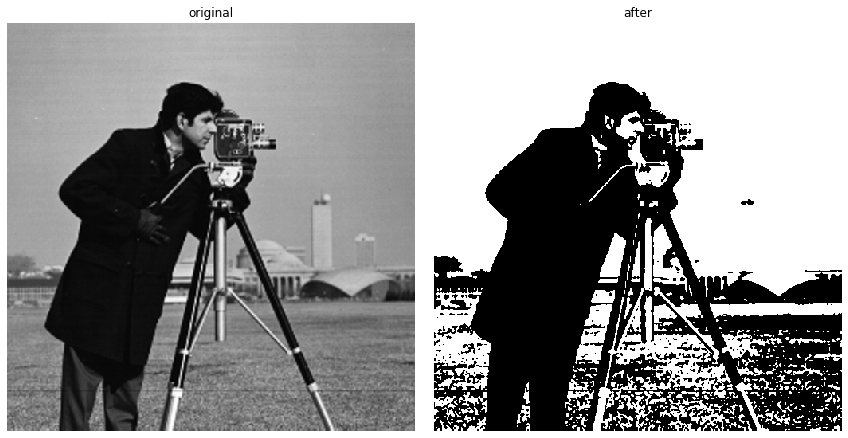

In [8]:
img_bin = threshold(img, 128)
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('original')
plt.axis('off')
plt.imshow(img, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('after')
plt.imshow(img_bin, cmap='gray')
plt.tight_layout()
plt.show()

### contrast stretching
Improve the contrast in an image by `stretching' the range of intensity values it contains to span a desired range of values.

$g(x,y)=\frac{d-c}{b-a}[f(x,y)-a]+c$

In [0]:
def contrast_stretch(img, vin=None, vout=[0,255]):
  img = img.astype(numpy.float)
  if vin is None:
    vin = [numpy.min(img), numpy.max(img)]
  out = ((img - vin[0]) / (vin[1] - vin[0])) * (vout[1] - vout[0]) + vout[0]
  out = [vout[1] if x > vout[1] else x for x in out.flat]
  out = [vout[0] if x < vout[0] else x for x in out]
  return numpy.reshape(out,img.shape).astype(numpy.uint8)

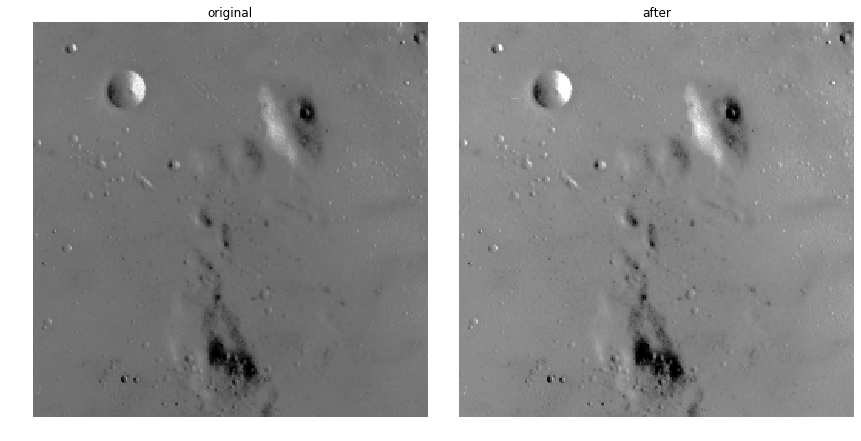

In [0]:
moon = skimage.data.moon()
out = contrast_stretch(moon, vin=[10, 200])
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('original')
plt.axis('off')
plt.imshow(moon, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('after')
plt.imshow(out, cmap='gray')
plt.tight_layout()
plt.show()

### gray level slicing
Enhance the pixel values within a certain range.

In [0]:
def gray_slicing(img, vin=[0,255], truncate=False):
  if truncate==True:
    out = [192 if x > vin[0] and x < vin[1] else 0 for x in img.flat]
  else:
    out = [192 if x > vin[0] and x < vin[1] else x for x in img.flat]
  return numpy.reshape(out,img.shape)

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


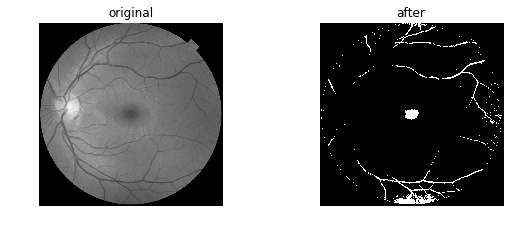

In [0]:
retina = skimage.img_as_ubyte(skimage.color.rgb2gray(skimage.data.retina()))
out = gray_slicing(retina, [60, 85], truncate=True)
plt.figure(figsize=(12, 12))
plt.subplot(2, 2, 1)
plt.title('original')
plt.axis('off')
plt.imshow(retina, cmap='gray')
plt.subplot(2, 2, 2)
plt.axis('off')
plt.title('after')
plt.imshow(out, cmap='gray')
plt.tight_layout()
plt.show()

### bit-plane slicing
Because each pixel in a grayscale image is stored as a 8-bits value, this image can be transformed into a sequence of binary images by breaking them up to their bit-planes.

In [0]:
def bitplanes(img):
  assert isinstance(img.flat[0], numpy.uint8), 'input image must be uint8.' 
  c0 = numpy.bitwise_and(img, 1) > 0  # LSB
  c1 = numpy.bitwise_and(img, 2) > 0
  c2 = numpy.bitwise_and(img, 4) > 0
  c3 = numpy.bitwise_and(img, 8) > 0
  c4 = numpy.bitwise_and(img, 16) > 0
  c5 = numpy.bitwise_and(img, 32) > 0
  c6 = numpy.bitwise_and(img, 64) > 0
  c7 = numpy.bitwise_and(img, 128) > 0  # MSB
  return [c0,c1,c2,c3,c4,c5,c6,c7]

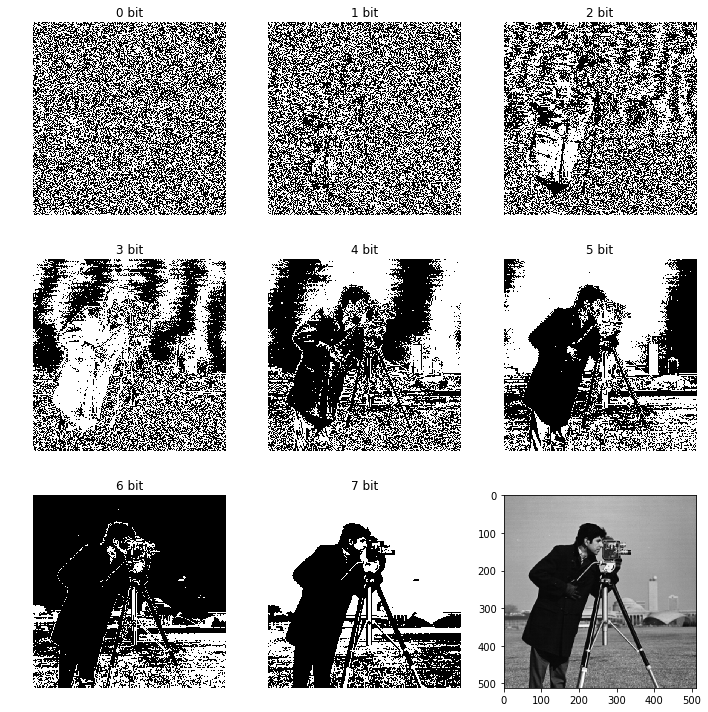

In [0]:
img_set = bitplanes(img)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
ax = axes.ravel()
for i in range(len(img_set)):
    ax[i].axis('off')
    ax[i].set_title(f'{i} bit')
    ax[i].imshow(img_set[i], cmap='gray')

ax[-1].imshow(img, cmap='gray')
plt.tight_layout()
plt.show()

Bitplane slicing can be used for *image compression*.

In [0]:
def reconstruct(images, n_img=2):
  recon_img = numpy.zeros(images[0].shape)
  for i in range(7, 7-n_img, -1):
    recon_img += 2**i*images[i]
  return recon_img.astype(numpy.uint8)

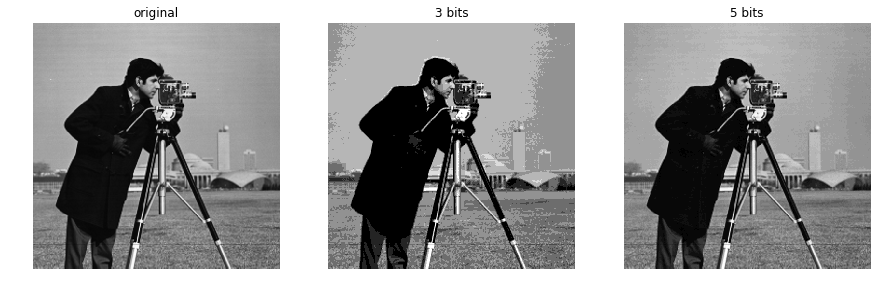

In [0]:
recon_3 = reconstruct(img_set, 3)
recon_5 = reconstruct(img_set, 5)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
ax = axes.ravel()
[ax_i.set_axis_off() for ax_i in ax]

ax[0].imshow(img,cmap='gray')
ax[0].set_title('original')
ax[1].imshow(recon_3, cmap='gray')
ax[1].set_title('3 bits')
ax[2].imshow(recon_5, cmap='gray')
ax[2].set_title('5 bits')
plt.show()

### log transform
The equation of log transform is stated as follow:

$g(x,y)=c*log(f(x,y)+1)$

g(x,y) has to be normalized to display the image correctly. the normalization factor c is

$c=\frac{255}{log(256)}$

In [0]:
def log_transform(img):
  img = img.astype(numpy.float)
  c = 255/numpy.log10(256)
  return (numpy.log10(img+1)*c).astype(numpy.uint8)

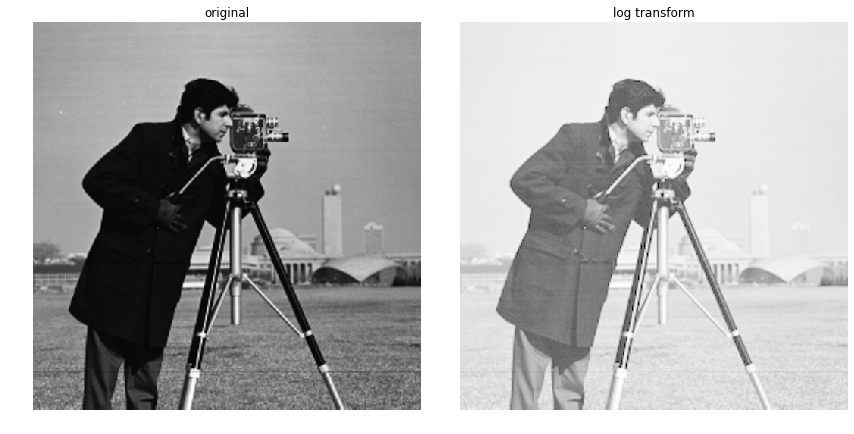

In [0]:
out = log_transform(img)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))
ax = axes.ravel()
ax[0].axis('off')
ax[0].set_title('original')
ax[0].imshow(img, cmap='gray')
ax[1].axis('off')
ax[1].set_title('log transform')
ax[1].imshow(out, cmap='gray')
plt.tight_layout()
plt.show()

### gamma transform

$g(x,y)=c*f(x,y)^{\gamma}$

in common case, $c=1$.  
The reason why we use gamma correction is because the human perception of brightness, under common illumination conditions is nonlinear.

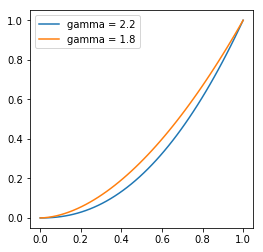

In [0]:
x = numpy.linspace(0,1,50)
y1 = x**2.2
y2 = x**1.8
plt.figure(figsize=(4,4))
plt.plot(x,y1, label = 'gamma = 2.2')
plt.plot(x,y2, label = 'gamma = 1.8')
plt.legend()
plt.show()

In [0]:
def gamma_transform(img, gamma=1.8):
  img = skimage.img_as_float(img)
  img_new = img**gamma
  return img_new

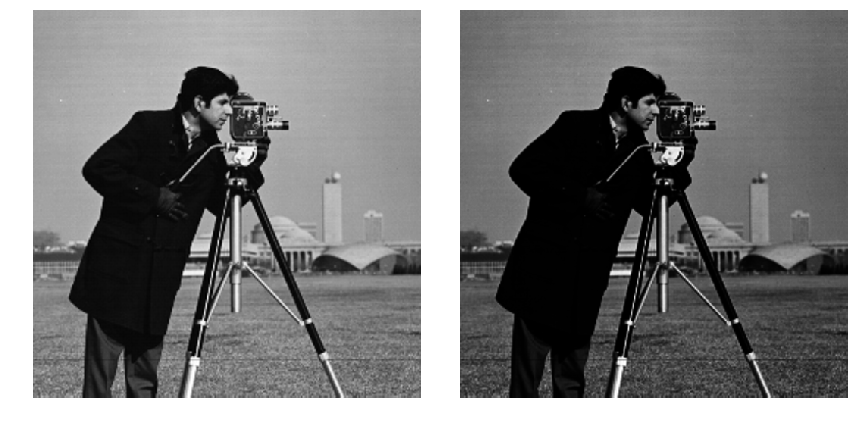

In [0]:
out = gamma_transform(img, 1.8)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,12))
ax = axes.ravel()
ax[0].axis('off')
ax[0].imshow(img, cmap='gray')
ax[1].axis('off')
ax[1].imshow(out, cmap='gray')
plt.tight_layout()
plt.show()

### histogram
Histogram is the distribution of numerical data.There are some provided functions to display(construct) a histogram. For example,
```python
matplotlib.pyplot.hist(img)  # display a histogram
numpy.histogram(a, bins)  # construct a histogram
```

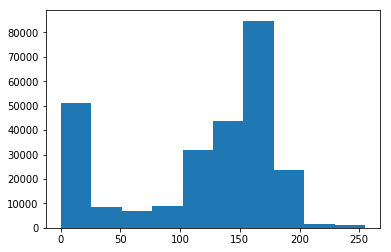

In [0]:
plt.hist(img.flat)
plt.show()

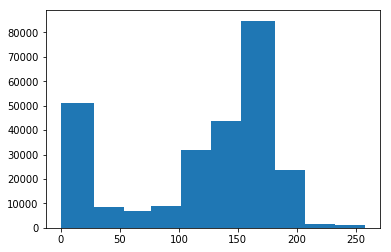

In [0]:
n_bins = 10
hist, bin_edges = numpy.histogram(img.flat, bins=n_bins)
plt.bar(bin_edges[:-1], hist, align='edge', width = 255/(n_bins-1))
plt.show()

### Histogram equalization 
Histogram equalization is a method for contrast adjustment.
Given an interval [a,b] and the corresponding interval [c,d] after the transformation, consider the area from a to b should be the same from c to d after the transformation

In [0]:
def hist_eq(img, L=256):
  h, _ = numpy.histogram(img.flat, bins=L)
  h = h/numpy.sum(h)
    
  # create the cdf
  H = numpy.zeros(len(h))
  H[0] = h[0]
  for x in range(1,len(h)):
    H[x] = h[x] + H[x-1]

  # create lookup table
  lut = numpy.zeros(len(h))
  for i in range(0, len(h)):
    lut[i] = numpy.round((L-1)*H[i]).astype(int)

  img = skimage.img_as_ubyte(img) #precision loss warning 
    
  img_eq = [lut[x] for x in img.flat] 
  img_eq = (numpy.reshape(img_eq,img.shape)).astype(numpy.uint8)
  return [img_eq, H, h]

To mount your Google drive, run the code block below:

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


You can access your drive from the slide out navigation on the left.

/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:135: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


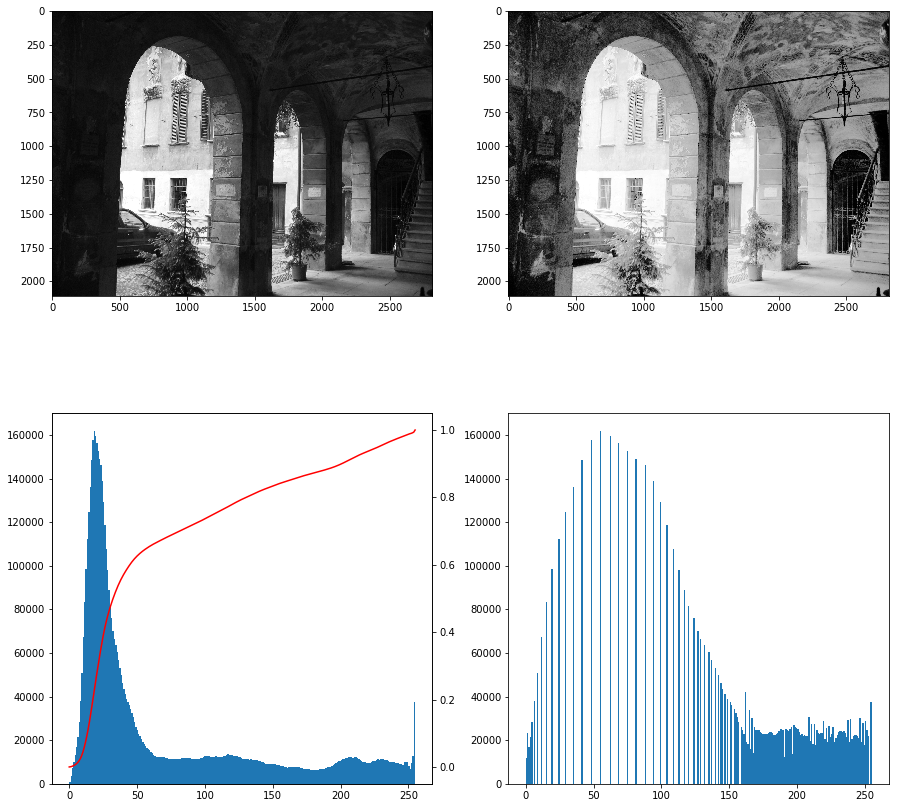

In [0]:
img_lc = skimage.io.imread('/content/drive/My Drive/Colab Notebooks/IP course/AquaTermi_lowcontrast.jpg')
img_lc = skimage.color.rgb2gray(img_lc)
img_lc = skimage.img_as_ubyte(img_lc)

img_eq, cdf, h = hist_eq(img_lc)
fig, axes = plt.subplots(2,2,figsize=(15,15))
ax = axes.ravel()
ax[0].imshow(img_lc, cmap='gray')
ax[1].imshow(img_eq,cmap='gray')
ax_cdf=ax[2].twinx()
ax_cdf.plot(range(256), cdf, 'r')
ax[2].hist(img_lc.flat, bins=256)
ax[3].hist(img_eq.flat, bins=256)
plt.show()

### Contrast limited adaptive histogram equalization(CLAHE)

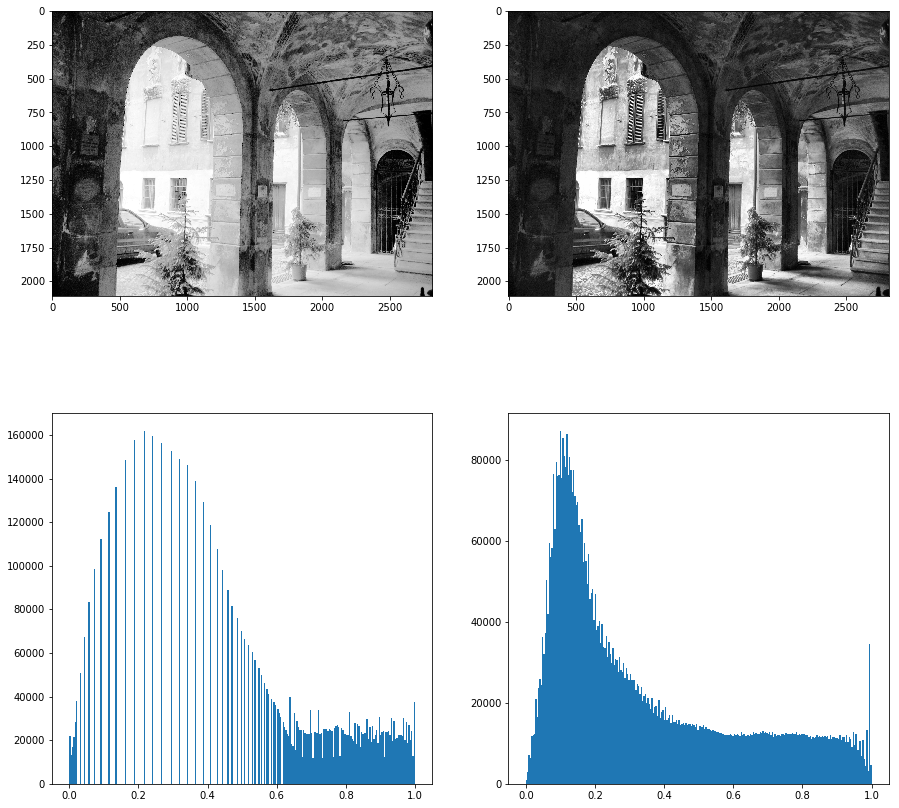

In [0]:
# use skimage exposure module
img1 = skimage.exposure.equalize_hist(img_lc)
img2 = skimage.exposure.equalize_adapthist(img_lc)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(img2,cmap='gray')
plt.subplot(2,2,3)
plt.hist(img1.flat, bins=256)
plt.subplot(2,2,4)
plt.hist(img2.flat, bins=256)
plt.show()

### Image averaging
Image Averaging is a powerful noise-reduction technique that has the power to remove noise while simultaneously enhancing detail. Suppose we acquire the same image many times but each image contains a certain amount of noises. The acquired images can be modeled by the following equation:  
  
$g^{(i)}(x,y)=f(x,y)+N(x,y),\;i=1,...,m$  
  
where $N(x,y)$ is the noise model. The noise model will add a noise value at pixel $(x,y)$ with a certain probability.

To demonstrate this idea, we add some random noises on the camera man image. (Don't worry, we'll talk about how to add noises on an image in later lectures.)

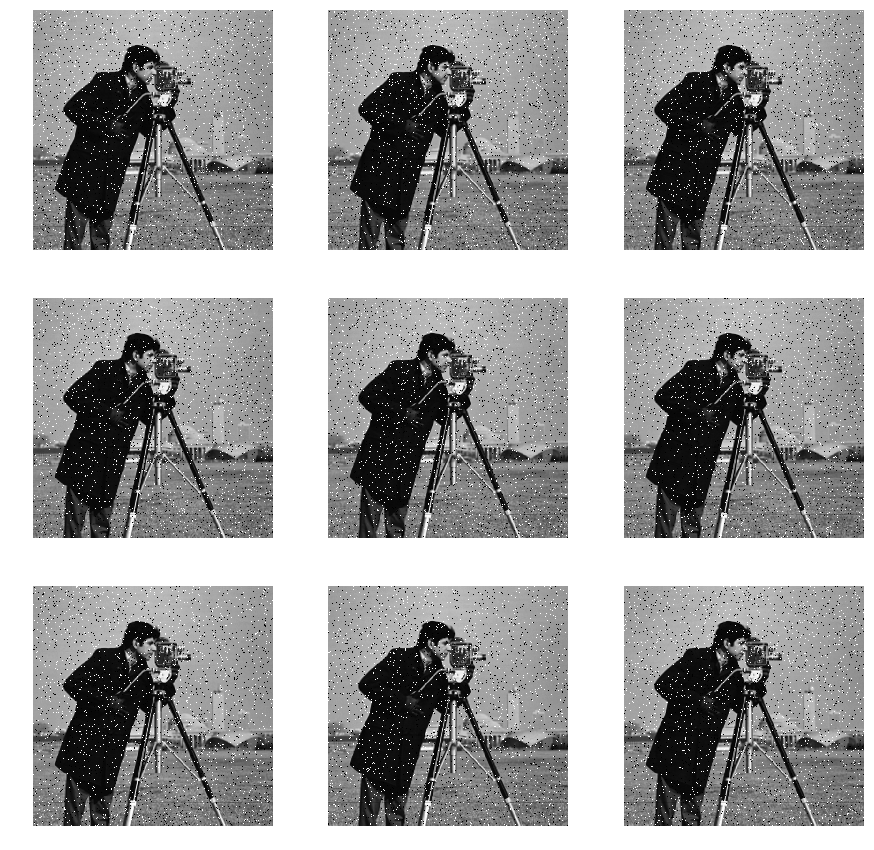

In [0]:
imgs = []
n_samples = 100
for i in range(n_samples):
  imgs.append(skimage.util.random_noise(img, mode='s&p'))

plt.figure(figsize=(15,15))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.axis('off')
  plt.imshow(imgs[i],cmap='gray')

plt.show()

Now, we can obtain a cleaner image by averaging these images.

$\frac{1}{m}\sum_{m}g^{(i)}(x,y)=\frac{1}{m}\sum_{m}f(x,y)+\frac{1}{m}\sum_{m}N(x,y)$

which will approximatly be $g(x,y)$.

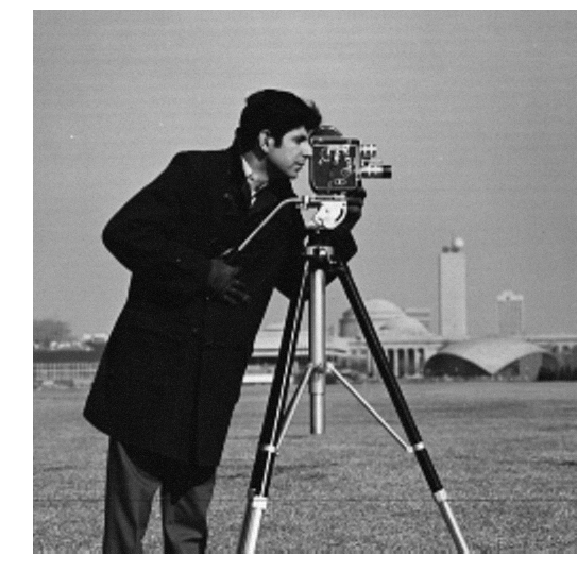

In [0]:
img_avg = numpy.mean(imgs, axis=0)
plt.figure(figsize=(10,10))
plt.imshow(img_avg, cmap='gray')
plt.axis('off')
plt.show()